Introduction: My metric in order to determine what the best neighboorhood in Pittsburgh is the air quaultiy around the area. The database that is used in this code is the daily air quality data in Allegheny County. 

The reason I was drawn to this metric is beacuse I used to suffer from asthma, the air quailty is a very imporatant factor of living when it comes to children and older adults who also have to prioritize their health. 

I explored schools districts and police presecene for neighboorhoods as other possible metrics, but I didn't think it properly filled out the requirment I was looking for. So when I found this database I jumped at the oppertunity and was settled with my decision.  

## Import Data

In [1]:
# load pandas and numpy
import pandas as pd
import numpy as np

In [2]:
air_quality_pandas = pd.read_csv("air_quality.csv", index_col="bp")

# looking at the first ten rows of data 
air_quality_pandas.head(10)

/opt/tljh/user/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,site,datetime,stat,bcstat,bcstat_txt,black_carbon,black_carbon_txt,bp_txt,co,co_txt,...,sonicws,sonicws_txt,uvpm,uvpm_txt,rainfall,rainfall_txt,solarrad,solarrad_txt,uv_rad,uv_rad_txt
bp,,,,,,,,,,,,,,,,,,,,,
NaN,Avalon,2016-01-15T00:00:00,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-30T00:00:00,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Lawrenceville 2,2016-02-16T00:00:00,Count,NaN,NaN,NaN,NaN,NaN,22.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Hr. of Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-16T00:00:00,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# We have a lot of blank lines, missing data, and diffrenet data-types; let's clean this up

air_quality_pandas.dropna()  # clears rows with NaN values

# looking at editied first ten rows of the data
air_quality_pandas.head(10)

,site,datetime,stat,bcstat,bcstat_txt,black_carbon,black_carbon_txt,bp_txt,co,co_txt,...,sonicws,sonicws_txt,uvpm,uvpm_txt,rainfall,rainfall_txt,solarrad,solarrad_txt,uv_rad,uv_rad_txt
bp,,,,,,,,,,,,,,,,,,,,,
NaN,Avalon,2016-01-15T00:00:00,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-30T00:00:00,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Lawrenceville 2,2016-02-16T00:00:00,Count,NaN,NaN,NaN,NaN,NaN,22.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Hr. of Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-15T00:00:00,Avg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Avalon,2016-01-16T00:00:00,Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Rearrange the data to count the frequency of primary care in each neighborhood.
count = air_quality_pandas['site'].value_counts() 
print(count)

Lincoln                     10699
North Braddock              10699
Harrison Township           10699
Parkway East                10699
Avalon                      10699
Flag Plaza                  10699
Lawrenceville               10699
South Fayette               10699
Lawrenceville 2             10699
Liberty                     10699
Glassport High Street       10699
Liberty 2                   10699
Clairton                     8694
West Mifflin                 8694
Parkway East (Near Road)     2478
Name: site, dtype: int64


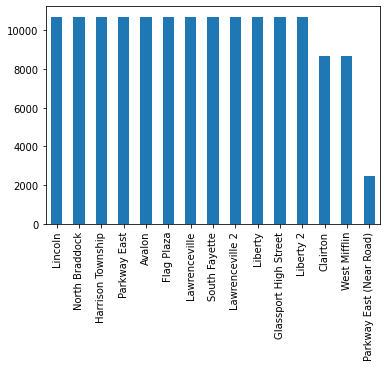

In [5]:
# set size of plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

# plot the bar graph
count.plot.bar()

In my metric, the lower the number the better. Most of the neighboorhoods have pretty similar results. The only one that really stands out is the best neighboorhood, Parkway East. 

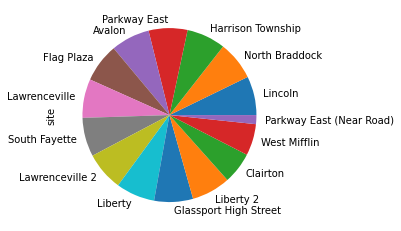

In [6]:
# let's take a look at a pie chart

pie_chart = count.plot.pie()

Again we can see that most of the neighboorhoods have the same air quality, yet Parkway Easy(Near Road) stands out again. 

Although there is no way to determine the true "best" neighboorhood, the best neighboorhood under the metric of air quality is Parkway East(Near Road). 
